### Clustering companies based on their stock performance

You'll cluster companies using their daily stock price movements (i.e. the **dollar difference** between the closing and opening prices for each trading day). You are given a dataset *movements* of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Choose a clustering algorithm and cluster the 60 companies into clusters. The number of clusters should be no more than 15.

Answer the question below:
0. Show your preprocessing steps?

-Applying companies to df, scaling data, Dimension reduction using PCA

1. What EDA can you do to get some sense about the dataset?

-.describe() & .corr().Tough dataset to analyze!

2. Which clustering algorithm did you choose, explain the reason. If your algorithm requires other hyper parameters, make the justifications on your choices (e.g., the `linkage` in AgglomerativeClustering).

-I chose the unsupervised learning KMeans Clustering model because we're only looking for the patterns and similarities in the data.

3. Show the clustering results.

4. Highlight two to three clusters of companies you have found. Are those companies similar to each other? (e.g., we would expect Honda and Toyota to be in the same cluster, because they are both Japanese car manufacturers. It won't be suprising if their stock perform similar to each other)

Most of these companies perform relatively similar to each other. There were about 4 or 5 companies in seperate clusters because of the way they trade. They seem to be separated based on the largeness of their standard deviations, and the difference between their minimum and maximum values. We can see that Google, Apple, Amazon, Goldman Sachs, & Mastercard all have somewhat significant values in these departments compared to the majority of the companies in cluster 3.

Hints:
- Some stocks are more expensive than others. 
    - for example, the stock price of company A is 100 and the stock of company B is 1000 dollars, even they increase and decrease the same percentage every day, the distance between them should still be large. How do you handle this issue? Or is this an issue in the algorithm you have chosen?
- Choose the clustering algorithm which can handle is dataset 
    - Remember each clustering algorithm has different assumption on the dataset.
    - If it is necessary, feel free to try to "compress" the dataset since there are hundreds of features.

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
movements = pd.read_csv("datasets/movement.csv",header=None)
movements.head()

,0,1,2,3,4,5,6,7,8,9,...,953,954,955,956,957,958,959,960,961,962
0,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [115]:
companies = ['Apple',
 'AIG',
 'Amazon',
 'American express',
 'Boeing',
 'Bank of America',
 'British American Tobacco',
 'Canon',
 'Caterpillar',
 'Colgate-Palmolive',
 'ConocoPhillips',
 'Cisco',
 'Chevron',
 'DuPont de Nemours',
 'Dell',
 'Ford',
 'General Electrics',
 'Google/Alphabet',
 'Goldman Sachs',
 'GlaxoSmithKline',
 'Home Depot',
 'Honda',
 'HP',
 'IBM',
 'Intel',
 'Johnson & Johnson',
 'JPMorgan Chase',
 'Kimberly-Clark',
 'Coca Cola',
 'Lookheed Martin',
 'MasterCard',
 'McDonalds',
 '3M',
 'Microsoft',
 'Mitsubishi',
 'Navistar',
 'Northrop Grumman',
 'Novartis',
 'Pepsi',
 'Pfizer',
 'Procter Gamble',
 'Philip Morris',
 'Royal Dutch Shell',
 'SAP',
 'Schlumberger',
 'Sony',
 'Sanofi-Aventis',
 'Symantec',
 'Toyota',
 'Total',
 'Taiwan Semiconductor Manufacturing',
 'Texas instruments',
 'Unilever',
 'Valero Energy',
 'Walgreen',
 'Wells Fargo',
 'Wal-Mart',
 'Exxon',
 'Xerox',
 'Yahoo']

In [116]:
len(companies)

60

In [117]:
companiesdf= pd.DataFrame(companies)
companiesdf = companiesdf.rename(columns={0:'Target'})
companiesdf.head()

,Target
0,Apple
1,AIG
2,Amazon
3,American express
4,Boeing


In [118]:
movements = movements.T
movements.columns = [companies]

In [119]:
movements = movements.T
movements.head()

,0,1,2,3,4,5,6,7,8,9,...,953,954,955,956,957,958,959,960,961,962
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [162]:
pd.set_option('display.max_columns', None)
movementsT= movements.T
movementsT.describe()

,Apple,AIG,Amazon,American express,Boeing,Bank of America,British American Tobacco,Canon,Caterpillar,Colgate-Palmolive,ConocoPhillips,Cisco,Chevron,DuPont de Nemours,Dell,Ford,General Electrics,Google/Alphabet,Goldman Sachs,GlaxoSmithKline,Home Depot,Honda,HP,IBM,Intel,Johnson & Johnson,JPMorgan Chase,Kimberly-Clark,Coca Cola,Lookheed Martin,MasterCard,McDonalds,3M,Microsoft,Mitsubishi,Navistar,Northrop Grumman,Novartis,Pepsi,Pfizer,Procter Gamble,Philip Morris,Royal Dutch Shell,SAP,Schlumberger,Sony,Sanofi-Aventis,Symantec,Toyota,Total,Taiwan Semiconductor Manufacturing,Texas instruments,Unilever,Valero Energy,Walgreen,Wells Fargo,Wal-Mart,Exxon,Xerox,Yahoo
count,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000
mean,-0.341246,-0.016272,0.164580,0.044206,0.038733,-0.019418,0.076075,0.012700,-0.025607,0.079273,0.020820,-0.000447,0.033489,0.011880,0.008214,-0.010343,-0.001059,-0.096042,-0.029304,0.023541,0.041246,0.022762,0.003666,0.127082,0.006999,0.026210,0.000125,0.042523,0.012845,0.051506,0.250415,0.013001,0.045234,0.007207,0.004725,-0.017394,0.049522,0.012690,0.043365,0.016874,0.048847,0.048442,0.068494,0.013032,0.006438,0.000727,0.020135,0.006231,0.035036,0.019107,-0.004091,0.035691,0.012565,0.003738,0.035462,0.011755,0.038733,0.043510,-0.001558,-0.000831
std,6.181568,0.793653,3.426001,0.678781,0.947419,0.223088,0.658690,0.362598,1.236689,0.734869,0.702072,0.244211,0.971052,0.551214,0.204687,0.219468,0.220064,7.373461,2.195747,0.309572,0.547248,0.299774,0.481534,1.501936,0.267695,0.488387,0.620038,0.600589,0.462747,0.876418,5.343201,0.636814,0.840676,0.317259,0.050406,0.969685,0.694842,0.393805,0.518334,0.215868,0.485684,0.701840,0.555776,0.621940,1.141904,0.258599,0.378615,0.243920,0.675504,0.515791,0.167167,0.398248,0.255976,0.551102,0.474825,0.442863,0.482442,0.698473,0.144362,0.287091
min,-30.119995,-4.810001,-15.160003,-2.809997,-4.989998,-1.199999,-3.040001,-2.299999,-4.849999,-3.900001,-4.500005,-1.120001,-4.029999,-2.600000,-0.880000,-1.520001,-0.870001,-60.540047,-22.919998,-1.340000,-2.750000,-1.150002,-4.120002,-5.740005,-0.860000,-2.090004,-2.500000,-4.330003,-2.279999,-3.599991,-26.509991,-2.490006,-2.990006,-1.720000,-0.250000,-4.840000,-2.730000,-2.270000,-2.260002,-1.040000,-2.369995,-3.230004,-2.290001,-2.640000,-4.489998,-1.670000,-2.310002,-0.820001,-2.709999,-2.489998,-0.720002,-1.349998,-1.170000,-2.789995,-1.890000,-1.770001,-1.880001,-2.930000,-0.860000,-1.529999
25%,-3.715012,-0.400000,-1.869995,-0.359998,-0.515000,-0.145000,-0.310005,-0.170000,-0.720001,-0.360001,-0.389993,-0.130001,-0.549996,-0.270002,-0.100000,-0.130000,-0.130000,-4.119991,-1.290001,-0.140002,-0.239998,-0.160000,-0.235001,-0.744999,-0.160000,-0.239998,-0.365000,-0.264995,-0.240002,-0.469993,-2.744989,-0.379997,-0.400002,-0.174998,-0.020000,-0.569999,-0.349999,-0.200003,-0.264999,-0.110000,-0.250000,-0.369997,-0.239998,-0.349998,-0.640000,-0.139999,-0.189999,-0.150000,-0.350002,-0.250000,-0.100000,-0.190002,-0.130001,-0.305001,-0.240001,-0.240002,-0.240003,-0.364998,-0.080000,-0.150000
50%,-0.040001,-0.029999,0.079987,0.060001,0.050003,-0.020000,0.079995,0.010003,0.009995,0.040001,0.039993,0.000000,0.100006,0.020000,0.000000,-0.010000,0.000000,-0.189995,0.000000,0.039997,0.040001,0.029999,0.020000,0.080002,0.010000,0.019997,0.010002,0.049997,0.009999,0.040000,0.200005,0.010002,0.099998,0.000000,0.010000,-0.020001,0.050000,0.020000,

In [121]:
### Get all the features columns except the class
features = list(movements.columns)[:]

### Get the features data
data = movements[features]

In [32]:
features

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [122]:
data

,0,1,2,3,4,5,6,7,8,9,...,953,954,955,956,957,958,959,960,961,962
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998
Bank of America,0.450000,0.460001,0.180000,0.250000,-0.199999,-0.060000,-0.359998,0.190001,0.190001,-0.379999,...,0.240000,0.210000,-0.050000,-0.010000,-0.030000,-0.240000,0.050000,0.110000,-0.060000,-0.110000
British American Tobacco,0.180000,0.220001,0.040001,0.250000,-0.360001,-0.099999,0.570000,-0.139999,0.260002,-0.150002,...,0.220001,2.250000,0.470001,0.320000,-0.040001,-0.430000,-0.019997,-0.129998,0.330002,1.150001
Canon,0.730000,0.369999,-0.099999,-0.169999,0.030003,0.110001,-0.079998,0.140000,0.389999,-0.130001,...,0.209999,0.560002,0.069999,0.119999,0.050003,-0.459999,0.259998,-0.109999,0.090001,-0.110001
Caterpillar,0.899997,0.700001,0.250000,0.369999,1.090000,3.179996,-0.769996,0.230004,-0.119998,-1.330002,...,0.209999,0.519996,1.029998,-0.020004,1.290001,-0.390000,1.209999,0.449997,-0.220001,0.159996
Colgate-Palmolive,0.360000,0.909996,-0.290001,-0.059998,1.300003,0.510003,1.050003,0.529999,-0.360001,-0.540001,...,0.949997,1.520001,-0.320000,-0.500000,1.080002,0.280002,0.620003,0.359996,1.070003,1.050003


## Modeling

In [155]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = StandardScaler().fit_transform(data)
data = pd.DataFrame(data)
clustering_kmeans = KMeans(n_clusters=6,random_state=102)
data['clusters'] = clustering_kmeans.fit_predict(data)

In [156]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,960,961,962,963,964,965,966,967,968,clusters
0,0.449620,-0.380381,-1.306039,-0.513189,0.847373,-2.162645,-1.230800,1.505120,-0.947150,-2.382046,...,-2.511682,0.612203,-5.742600,-4.358899,3.887710,3.887710,2.021616,-3.479001,2.021616,1
1,-1.361727,-0.926792,0.049710,-0.159483,0.165160,0.082501,-0.925091,-0.306104,-0.407937,0.096097,...,0.020786,-0.743369,0.111444,0.229416,-0.169031,-0.169031,-0.388257,0.089205,-0.388257,3
2,-3.900583,1.500329,-0.856950,-0.909338,1.747601,-1.820014,-1.383670,0.455814,-2.015940,-0.751976,...,2.320023,-2.230107,1.001844,0.229416,-2.197401,-2.197401,3.628199,-5.263104,3.628199,0
3,-0.248197,-0.100812,0.248838,0.378152,-0.200558,0.019385,0.765338,-0.152381,0.323847,0.299855,...,0.920486,-0.262364,0.076754,0.229416,-0.169031,-0.169031,-0.388257,0.089205,-0.388257,3
4,0.271453,2.148394,0.795374,1.307222,-0.291992,-0.710967,0.414664,0.014703,0.217933,-0.019549,...,0.963330,0.929211,0.010262,0.229416,-0.169031,-0.169031,-0.388257,0.089205,-0.388257,3


In [163]:
labels = clustering_kmeans.labels_

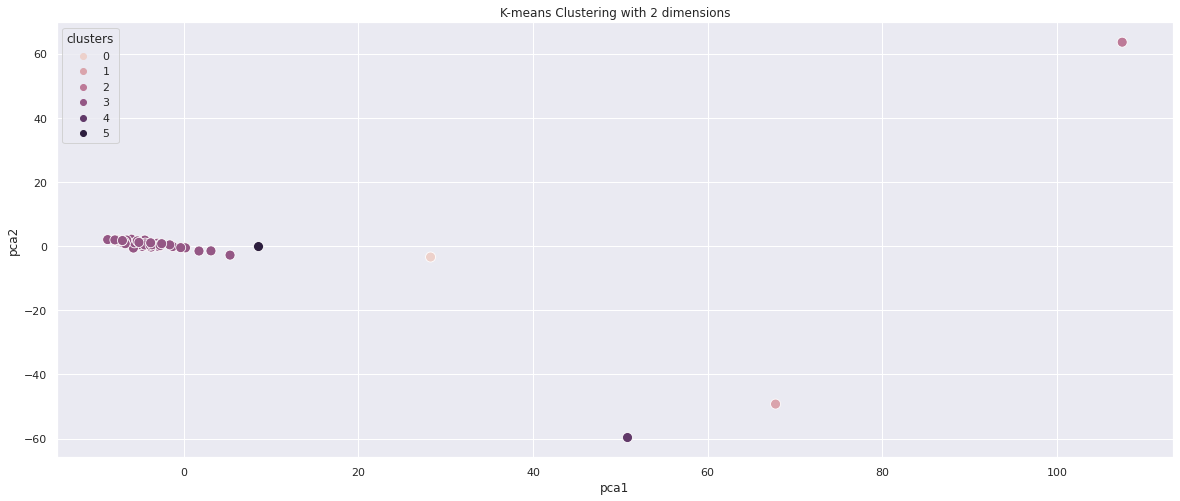

In [158]:
reduced_data = PCA(n_components=2).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
sns.set()
plt.figure(figsize=(20,8))
sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results, s=100)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [133]:
results.head()

,pca1,pca2
0,67.316407,-50.743526
1,-4.446408,1.914911
2,28.066030,-3.460305
3,-2.848794,-0.125704
4,-1.242119,-0.094092


In [168]:
df = pd.concat([results, companiesdf], axis = 1)
df = pd.concat([df, data['clusters']],axis = 1)
df

,pca1,pca2,Target,clusters
0,67.777893,-49.232888,Apple,1
1,-4.477906,1.899325,AIG,3
2,28.257187,-3.395488,Amazon,0
3,-2.875689,-0.147781,American express,3
4,-1.273468,-0.109445,Boeing,3
5,-7.433361,1.890201,Bank of America,3
6,-4.134541,0.113710,British American Tobacco,3
7,-5.762986,1.199802,Canon,3
8,3.100414,-1.477520,Caterpillar,3
9,-4.766207,-0.066163,Colgate-Palmolive,3


In [181]:
df.nunique()

pca1        60
pca2        60
Target      60
clusters     6
dtype: int64

In [193]:
df.groupby(['clusters','Target'])[['clusters']].sum()

clusters
clusters Target                                      
0        Amazon                                     0
1        Apple                                      1
2        Google/Alphabet                            2
3        3M                                         3
         AIG                                        3
         American express                           3
         Bank of America                            3
         Boeing                                     3
         British American Tobacco                   3
         Canon                                      3
         Caterpillar                                3
         Chevron                                    3
         Cisco                                      3
         Coca Cola                                  3
         Colgate-Palmolive                          3
         ConocoPhillips                             3
         Dell                                       3
         DuPont de Nemours                          3
         Exxon                                      3
         Ford                                       3
         General Electrics                          3
         GlaxoSmithKline                            3
         HP                                         3
         Home Depot                                 3
         Honda                                      3
         IBM                                        3
         Intel                                      3
         JPMorgan Chase                             3
         Johnson & Johnson                          3
         Kimberly-Clark                             3
         Lookheed Martin                            3
         McDonalds                                  3
         Microsoft                                  3
         Mitsubishi                                 3
         Navistar                                   3
         Northrop Grumman                           3
         Novartis                                   3
         Pepsi                                      3
         Pfizer                                     3
         Philip Morris                              3
         Procter Gamble                             3
         Royal Dutch Shell                          3
         SAP                                        3
         Sanofi-Aventis                             3
         Schlumberger                               3
         Sony                                       3
         Symantec                                   3
         Taiwan Semiconductor Manufacturing         3
         Texas instruments                          3
         Total                                      3
         Toyota                                     3
         Unilever                                   3
         Valero Energy                              3
         Wal-Mart                                   3
         Walgreen                                   3
         Wells Fargo                                3
         Xerox                                      3
         Yahoo                                      3
4        MasterCard                                 4
5        Goldman Sachs                              5

In [194]:
movementsT.describe()

,Apple,AIG,Amazon,American express,Boeing,Bank of America,British American Tobacco,Canon,Caterpillar,Colgate-Palmolive,ConocoPhillips,Cisco,Chevron,DuPont de Nemours,Dell,Ford,General Electrics,Google/Alphabet,Goldman Sachs,GlaxoSmithKline,Home Depot,Honda,HP,IBM,Intel,Johnson & Johnson,JPMorgan Chase,Kimberly-Clark,Coca Cola,Lookheed Martin,MasterCard,McDonalds,3M,Microsoft,Mitsubishi,Navistar,Northrop Grumman,Novartis,Pepsi,Pfizer,Procter Gamble,Philip Morris,Royal Dutch Shell,SAP,Schlumberger,Sony,Sanofi-Aventis,Symantec,Toyota,Total,Taiwan Semiconductor Manufacturing,Texas instruments,Unilever,Valero Energy,Walgreen,Wells Fargo,Wal-Mart,Exxon,Xerox,Yahoo
count,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000
mean,-0.341246,-0.016272,0.164580,0.044206,0.038733,-0.019418,0.076075,0.012700,-0.025607,0.079273,0.020820,-0.000447,0.033489,0.011880,0.008214,-0.010343,-0.001059,-0.096042,-0.029304,0.023541,0.041246,0.022762,0.003666,0.127082,0.006999,0.026210,0.000125,0.042523,0.012845,0.051506,0.250415,0.013001,0.045234,0.007207,0.004725,-0.017394,0.049522,0.012690,0.043365,0.016874,0.048847,0.048442,0.068494,0.013032,0.006438,0.000727,0.020135,0.006231,0.035036,0.019107,-0.004091,0.035691,0.012565,0.003738,0.035462,0.011755,0.038733,0.043510,-0.001558,-0.000831
std,6.181568,0.793653,3.426001,0.678781,0.947419,0.223088,0.658690,0.362598,1.236689,0.734869,0.702072,0.244211,0.971052,0.551214,0.204687,0.219468,0.220064,7.373461,2.195747,0.309572,0.547248,0.299774,0.481534,1.501936,0.267695,0.488387,0.620038,0.600589,0.462747,0.876418,5.343201,0.636814,0.840676,0.317259,0.050406,0.969685,0.694842,0.393805,0.518334,0.215868,0.485684,0.701840,0.555776,0.621940,1.141904,0.258599,0.378615,0.243920,0.675504,0.515791,0.167167,0.398248,0.255976,0.551102,0.474825,0.442863,0.482442,0.698473,0.144362,0.287091
min,-30.119995,-4.810001,-15.160003,-2.809997,-4.989998,-1.199999,-3.040001,-2.299999,-4.849999,-3.900001,-4.500005,-1.120001,-4.029999,-2.600000,-0.880000,-1.520001,-0.870001,-60.540047,-22.919998,-1.340000,-2.750000,-1.150002,-4.120002,-5.740005,-0.860000,-2.090004,-2.500000,-4.330003,-2.279999,-3.599991,-26.509991,-2.490006,-2.990006,-1.720000,-0.250000,-4.840000,-2.730000,-2.270000,-2.260002,-1.040000,-2.369995,-3.230004,-2.290001,-2.640000,-4.489998,-1.670000,-2.310002,-0.820001,-2.709999,-2.489998,-0.720002,-1.349998,-1.170000,-2.789995,-1.890000,-1.770001,-1.880001,-2.930000,-0.860000,-1.529999
25%,-3.715012,-0.400000,-1.869995,-0.359998,-0.515000,-0.145000,-0.310005,-0.170000,-0.720001,-0.360001,-0.389993,-0.130001,-0.549996,-0.270002,-0.100000,-0.130000,-0.130000,-4.119991,-1.290001,-0.140002,-0.239998,-0.160000,-0.235001,-0.744999,-0.160000,-0.239998,-0.365000,-0.264995,-0.240002,-0.469993,-2.744989,-0.379997,-0.400002,-0.174998,-0.020000,-0.569999,-0.349999,-0.200003,-0.264999,-0.110000,-0.250000,-0.369997,-0.239998,-0.349998,-0.640000,-0.139999,-0.189999,-0.150000,-0.350002,-0.250000,-0.100000,-0.190002,-0.130001,-0.305001,-0.240001,-0.240002,-0.240003,-0.364998,-0.080000,-0.150000
50%,-0.040001,-0.029999,0.079987,0.060001,0.050003,-0.020000,0.079995,0.010003,0.009995,0.040001,0.039993,0.000000,0.100006,0.020000,0.000000,-0.010000,0.000000,-0.189995,0.000000,0.039997,0.040001,0.029999,0.020000,0.080002,0.010000,0.019997,0.010002,0.049997,0.009999,0.040000,0.200005,0.010002,0.099998,0.000000,0.010000,-0.020001,0.050000,0.020000,

In [201]:
pd.DataFrame(movementsT.std()).sort_values(by=[0],ascending=False)

,0
Google/Alphabet,7.373461
Apple,6.181568
MasterCard,5.343201
Amazon,3.426001
Goldman Sachs,2.195747
IBM,1.501936
Caterpillar,1.236689
Schlumberger,1.141904
Chevron,0.971052
Navistar,0.969685


In [202]:
pd.DataFrame(movementsT.mean()).sort_values(by=[0],ascending=False)

,0
MasterCard,0.250415
Amazon,0.164580
IBM,0.127082
Colgate-Palmolive,0.079273
British American Tobacco,0.076075
Royal Dutch Shell,0.068494
Lookheed Martin,0.051506
Northrop Grumman,0.049522
Procter Gamble,0.048847
Philip Morris,0.048442


In [203]:
pd.DataFrame(movementsT.min()).sort_values(by=[0],ascending=False)

,0
Mitsubishi,-0.250000
Taiwan Semiconductor Manufacturing,-0.720002
Symantec,-0.820001
Xerox,-0.860000
Intel,-0.860000
General Electrics,-0.870001
Dell,-0.880000
Pfizer,-1.040000
Cisco,-1.120001
Honda,-1.150002


In [204]:
pd.DataFrame(movementsT.max()).sort_values(by=[0],ascending=False)

,0
Google/Alphabet,34.830004
MasterCard,30.849991
Apple,30.760009
Amazon,14.630005
Goldman Sachs,7.830002
IBM,6.470002
AIG,5.340000
Lookheed Martin,4.890007
Toyota,4.509995
Navistar,4.440001
